In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 14.9MB/s]


In [5]:
!unzip /content/heart-disease-dataset.zip

Archive:  /content/heart-disease-dataset.zip
  inflating: heart.csv               


#Heart Disease Prediction using Machine Learning algorithms

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Reading the Dataset

In [8]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
df.size

14350

In [14]:
df.shape

(1025, 14)

In [15]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
344,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
105,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
327,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
100,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
809,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
291,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
910,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# checking for null values in the dataset

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
!pip install seaborn

#Feature Selection

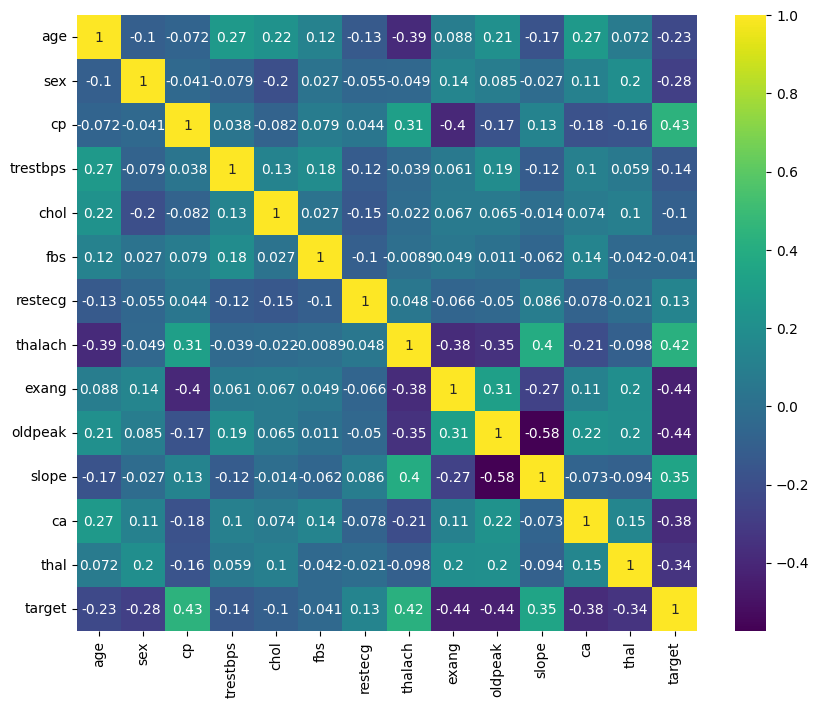

In [19]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

#Data VisualiZation

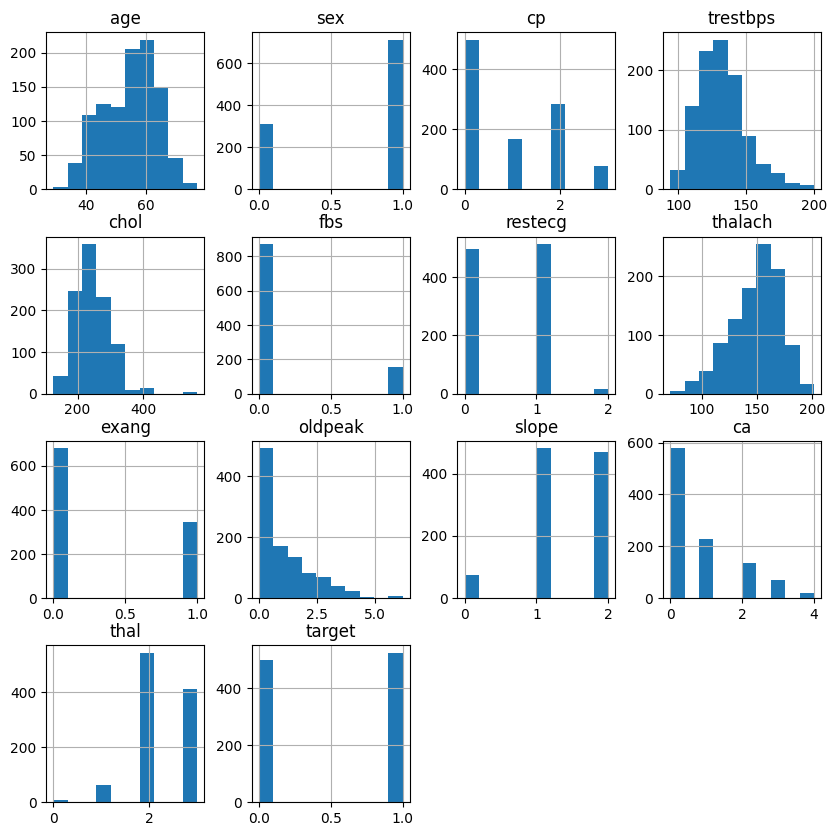

In [20]:
df.hist(figsize=(10,10))
plt.show()

#Spliting the dataset into training and testing

In [21]:
x,y=df,df.target

In [22]:
x.drop('target',axis=1,inplace=True)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
x.shape

(1025, 13)

In [25]:
y.shape

(1025,)

In [26]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [28]:
X_test

array([[ 0.28296121,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168],
       [ 1.05491812,  0.66150409,  1.99930453, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -0.6241209 ,
         2.17981673, -0.52212231],
       ...,
       [ 1.27547724,  0.66150409, -0.91575542, ...,  0.99543334,
        -0.73197147, -2.1340963 ],
       [-0.04787747,  0.66150409,  1.02761788, ..., -0.6241209 ,
        -0.73197147,  1.08985168],
       [ 1.38575679,  0.66150409, -0.91575542, ..., -0.6241209 ,
         1.20922066,  1.08985168]])

In [29]:
Y_test

620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [30]:
print ("Train_set_x shape: " + str(X_train.shape))
print ("Train_set_y shape: " + str(Y_train.shape))
print ("Test_set_x shape: " + str(X_test.shape))
print ("Test_set_y shape: " + str(Y_test.shape))

Train_set_x shape: (717, 13)
Train_set_y shape: (717,)
Test_set_x shape: (308, 13)
Test_set_y shape: (308,)


#Logistic Regression

In [31]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [32]:
pred1=LR.predict(X_test)
acc_LR=accuracy_score(Y_test,pred1)*100
print('Accuracy score using LR:',acc_LR)

Accuracy score using LR: 85.71428571428571


In [33]:
pred1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [34]:
# accuracy on training data
X_train_prediction = LR.predict(X_train)
training_data_accuracy_LR = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy_LR)

0.8633193863319386


In [35]:
# accuracy on testing data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.8571428571428571


#Predictive System For LR

In [36]:
input=(78,1,3,45,33,7,5,78,8,1,65,7,8)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_LR=LR.predict(input_reshape)
print(pred_LR)
if (pred_LR[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


#Naive Bayes

In [37]:
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [38]:
pred2=NB.predict(X_test)
acc_NB=accuracy_score(Y_test,pred2)*100
print('Accuracy score using NB:',acc_NB)

Accuracy score using NB: 83.11688311688312


In [39]:
pred2

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

#Predictive System For NB



In [40]:
input=(63,1,3,145,233,4,5,778,8,1.5,8,7,8)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_NB=NB.predict(input_reshape)
print(pred_NB)
if (pred_NB[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


#Decision Tree Classifier

In [41]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
pred3=dt.predict(X_test)
acc_dt=accuracy_score(Y_test,pred3)*100
print('Accuracy score using DT:',acc_dt,'%')

Accuracy score using DT: 97.40259740259741 %


In [43]:
pred3

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

#Predictive System For DT

In [44]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_dt=dt.predict(input_reshape)
print(pred_dt)
if (pred_dt[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


#K-Nearest Neighbor

In [45]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(Y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(Y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 1 with score : 0.9512987012987013


In [46]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
pred4 = knn.predict(X_test)
acc_knn = accuracy_score(Y_test,pred4)*100
print('Accuracy_score using KNN : ',acc_knn,'%')

Accuracy_score using KNN :  95.12987012987013 %


In [48]:
pred4

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [49]:
print('Accuracy score using DT:',acc_dt,'%')
print('Accuracy_score using KNN : ',acc_knn,'%')

Accuracy score using DT: 97.40259740259741 %
Accuracy_score using KNN :  95.12987012987013 %


#Predictive System For KNN

In [50]:
input=(56,0,1,140,294,0,0,153,0,1.3,1,0,2)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_knn=knn.predict(input_reshape)
print(pred_knn)
if (pred_knn[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


#Random Forest Classifier

In [51]:
RFC = RandomForestClassifier(max_depth=5)
RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [52]:
pred5 = RFC.predict(X_test)
acc_RFC = accuracy_score(Y_test,pred5)*100
print('Accuracy_score using RFC : ',acc_RFC,'%')

Accuracy_score using RFC :  89.6103896103896 %


In [53]:
pred5

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

#Predictive System For RFC

In [54]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_array=np.asarray(input)
input_reshape = input_array.reshape(1,-1)
pred_RFC=RFC.predict(input_reshape)
print(pred_RFC)
if (pred_RFC[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [55]:
print('Accuracy_score using RFC : ',acc_RFC,'%')
print('Accuracy score using NB:',acc_NB)
print('Accuracy score using LR:',acc_LR)

Accuracy_score using RFC :  89.6103896103896 %
Accuracy score using NB: 83.11688311688312
Accuracy score using LR: 85.71428571428571


In [56]:
algorithm=['RFC','LR','KNN','DT','NB']
scores=[acc_RFC,acc_LR,acc_knn,acc_dt,acc_NB]

<ipython-input-57-ff19d51bf0b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithm, y=scores, palette=colors)


Text(0, 0.5, 'Accuracy score')

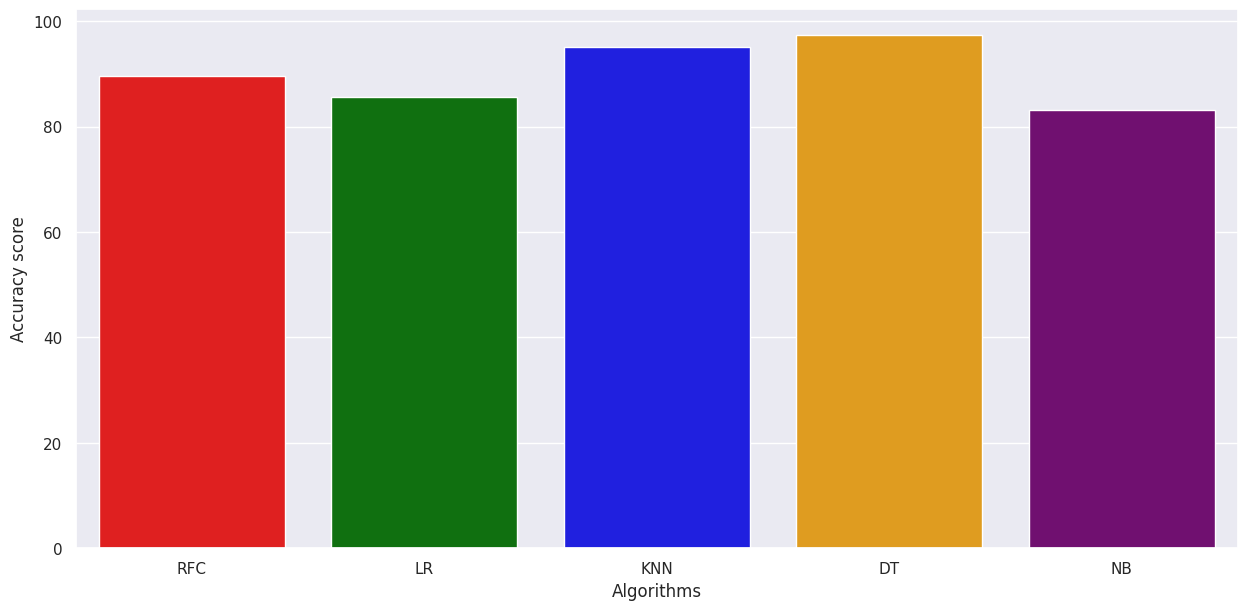

In [57]:
sns.set(rc={'figure.figsize':(15,7)})
algorithm=['RFC','LR','KNN','DT','NB']
scores=[acc_RFC,acc_LR,acc_knn,acc_dt,acc_NB]
colors =["red", "green", "blue", "orange", "purple"]
sns.barplot(x=algorithm, y=scores, palette=colors)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")